In [13]:
import pandas as pd
T1 = pd.read_csv(r'C:\Users\User\Desktop\exstreme.csv',delimiter =';')
T1

,TIME,principal component 1
0,100100000,"0,822989099"
1,100400000,"0,970579842"
2,100800000,"0,818569339"
3,101300000,"0,40564853"
4,102100000,"0,468480859"
5,102400000,"0,523412077"
6,102500000,"0,698984703"
7,103400000,"0,627889814"
8,133000000,"0,87028432"
9,133500000,"0,500801493"


In [14]:
#Преобразование в datetime format 
t= T1['TIME']
time_delta = pd.to_datetime(t, format='%H%M%S%f')- pd.to_datetime(100000000,format='%H%M%S%f')
time_delta

0    0 days 00:01:00
1    0 days 00:04:00
2    0 days 00:08:00
3    0 days 00:13:00
4    0 days 00:21:00
5    0 days 00:24:00
6    0 days 00:25:00
7    0 days 00:34:00
8    0 days 03:30:00
9    0 days 03:35:00
10   0 days 03:54:00
11   0 days 03:56:00
12   0 days 04:00:00
13   0 days 04:10:00
14   0 days 04:43:00
15   0 days 04:48:00
16   0 days 04:51:00
17   0 days 04:55:00
18   0 days 05:11:00
19   0 days 05:13:00
20   0 days 05:22:00
21   0 days 05:49:00
22   0 days 05:58:00
23   0 days 06:07:00
24   0 days 06:19:00
25   0 days 06:21:00
26   0 days 06:27:00
27   0 days 06:58:00
28   0 days 07:10:00
29   0 days 07:34:00
30   0 days 07:42:00
31   0 days 07:44:00
32   0 days 08:01:00
33   0 days 08:05:00
34   0 days 08:06:00
35   0 days 08:10:00
36   0 days 08:21:00
37   0 days 08:29:00
38   0 days 08:33:00
39   0 days 08:35:00
40   0 days 08:37:00
41   0 days 08:39:00
Name: TIME, dtype: timedelta64[ns]

In [15]:
#Перевести время с момента 100000000 в минуты
times = []
for t in time_delta:
    times.append(t.seconds//60)

print(times)

[1, 4, 8, 13, 21, 24, 25, 34, 210, 215, 234, 236, 240, 250, 283, 288, 291, 295, 311, 313, 322, 349, 358, 367, 379, 381, 387, 418, 430, 454, 462, 464, 481, 485, 486, 490, 501, 509, 513, 515, 517, 519]


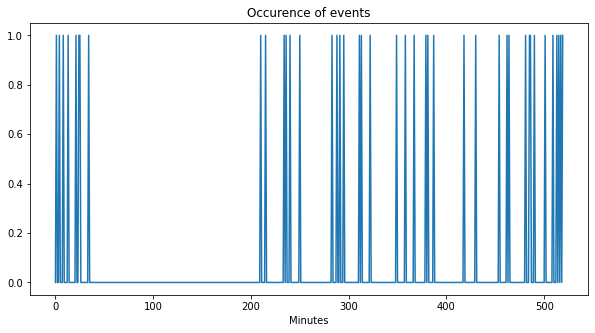

In [16]:
# Время возникновения событий
import numpy as np
import matplotlib.pyplot as plt

bc = np.bincount(np.floor(times).astype(int))

plt.figure(figsize=(10,5))
plt.title("Occurence of events")
plt.xlabel("Minutes")
plt.plot(bc[:521])

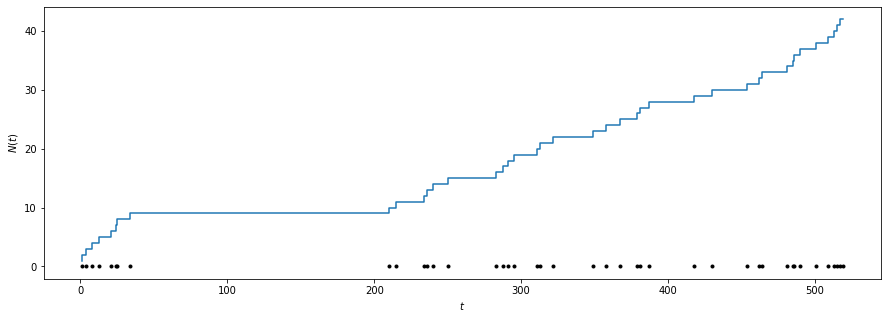

In [17]:
#Counting process N(t)/Процесс счета
ar_pp = sorted(times)
f = plt.figure(figsize=(15,5))

plt.step(ar_pp, np.cumsum(np.ones_like(ar_pp)))
plt.ylabel("$N(t)$")
plt.xlabel('$t$')
_ = plt.plot(ar_pp, np.zeros_like(ar_pp), 'k.')

In [18]:
import Hawkes as hk
import numpy as np
itv = [0,10000] # the observation interval
T = np.array(times) # sample data
model = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const').set_data({'T':T}, itv)
model.fit(T,itv) # T is the event times (numpy.ndarray)
print("parameter:",model.parameter) # the estimated parameter values
print("branching ratio:",model.br) # the branching ratio
print("log-likelihood:",model.L) # the log-likelihood of the estimated parameter values
print("AIC:",model.AIC) # the AIC of the estimated parameter values

parameter: {'mu': 0.0002070808554733924, 'alpha': array([3.31043050e-06, 9.50691773e-01]), 'beta': array([0.05672532, 0.05519095])}
branching ratio: 0.9506950830024093
log-likelihood: -160.178512705162
AIC: 326.357025410324


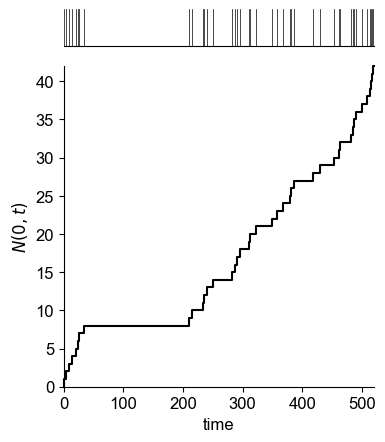

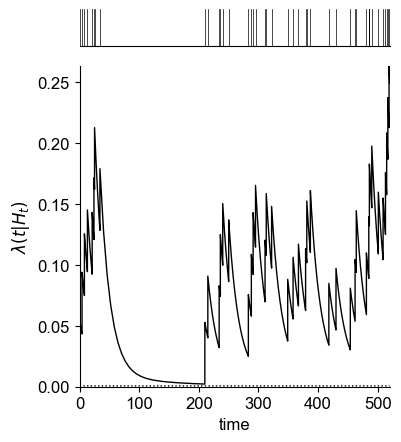

In [19]:
import numpy as np
import Hawkes as hk

para = {"mu":0.0007, "alpha":[0.82797547, 0.14487605], "beta":[0.05919899, 0.01127652]}
itv = [0,520]
T = np.array(times)
model = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const').set_parameter(para).set_data({'T':T}, itv)
model.plot_N() # the figure of N(0,T)
model.plot_l() # the figure of time vs conditional intensity function

In [20]:
[T_trans, itv_trans] = model.t_trans()

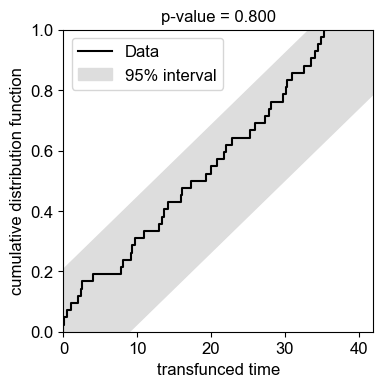

In [21]:
#Проверка на нормальность распределения
model.plot_KS()